In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point
import random

In [2]:
# Leer el archivo shapefile desde la carpeta de datos
gdf = gpd.read_file('LimiteMunicipal_MGJ2012_modificadoDecreto26837.shp')
gdf

DataSourceError: Unable to open LimiteMunicipal_MGJ2012_modificadoDecreto26837.shx or LimiteMunicipal_MGJ2012_modificadoDecreto26837.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [ ]:
from unidecode import unidecode
gdf['NOMBRE'] = gdf['NOMBRE'].apply(unidecode)
gdf['NOMBRE'] = gdf['NOMBRE'].str.lower()
gdf['NOMBRE']

0                       acatic
1            acatlan de juarez
2         ahualulco de mercado
3                     amacueca
4                     amatitan
                ...           
120      zapotitlan de vadillo
121           zapotlan del rey
122                zapotlanejo
123    san ignacio cerro gordo
124                  mezquitic
Name: NOMBRE, Length: 125, dtype: object

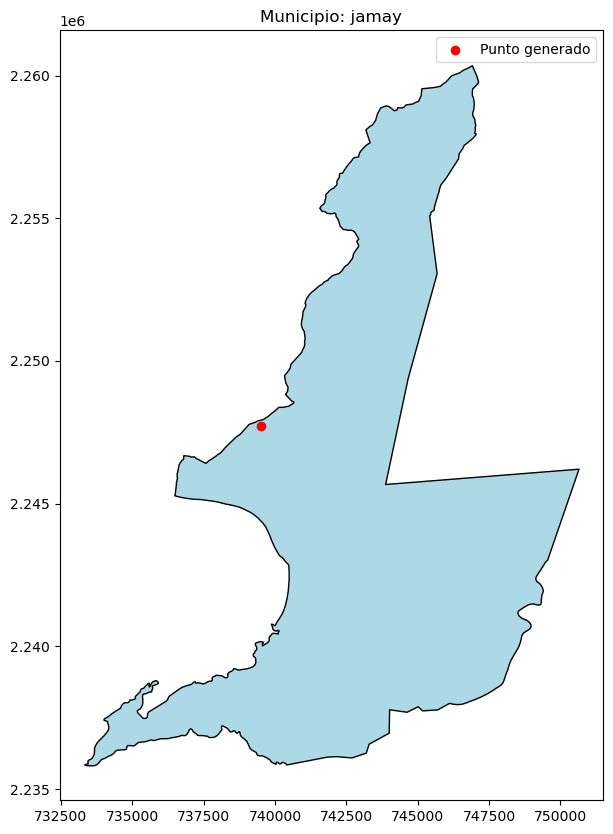

In [ ]:
municipio = input("Ingrese el nombre del municipio: ").lower()

municipio_gdf = gdf[gdf['NOMBRE'] == municipio]

if municipio_gdf.empty:
    print("El municipio no se encontró.")
else:

    polygon = municipio_gdf.iloc[0].geometry

    minx, miny, maxx, maxy = polygon.bounds
    while True:
        random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(random_point):
            print(random_point)
            break
        
    ax = municipio_gdf.plot(color='lightblue', edgecolor='black', figsize=(10, 10))
    plt.scatter(random_point.x, random_point.y, color='red', label='Punto generado')
    plt.legend()
    plt.title(f"Municipio: {municipio}")
    plt.show()